# Police Incident Data (Safety)

## Description
* We first selected the "Police Incident Blotter" as our initial metric to assess the safety of neighborhoods in Pittsburgh. We are assuming better neighborhoods have fewer reports. To identify the 20 safest neighborhoods in terms of arrest rates, we utilized the value_counts() function to count the number of arrests for each unique neighborhood in the dataset. Subsequently, we applied the sort_values() function to obtain the top 20 neighborhoods with the lowest number of reports. This approach allowed us to rank the neighborhoods based on their relative safety levels.

In [2]:
import pandas as pd
arrest_data = pd.read_csv ("Incident.csv")
arrest_data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,309158680,23053615,6,2023-04-12T07:00:00,"500 Block Smithfield St Pittsburgh, PA 15222",N,Central Business District,2,THEFT FROM AUTO,3934 Theft from Vehicle,201.0,6.0,6.0,-79.998119,40.440340
1,309165466,23053643,0,2023-04-12T09:00:00,"N Fairmount St & Rosetta St Pittsburgh, PA 15206",N,Garfield,5,99,9999 9999 - (Misc. Incident):,1114.0,9.0,2.0,-79.931355,40.466338
2,309165930,23053633,6,2023-04-11T23:00:00,"2100 Block Merriman Way Pittsburgh, PA 15203",N,South Side Flats,3,THEFT FROM AUTO,3934 Theft from Vehicle / 4106 Access Device F...,1609.0,3.0,3.0,-79.975876,40.430655
3,309168723,23053667,6,2023-04-12T01:05:00,"400 Block Orchard Pl Pittsburgh, PA 15210",N,Knoxville,3,THEFT,3921 Theft by Unlawful Taking or Disposition. ...,3001.0,3.0,5.0,-79.995428,40.417685
4,309168868,23053660,5,2023-04-12T07:30:00,"1400 Block Beldale St Pittsburgh, PA 15233",N,Manchester,1,BURGLARY,3502 Burglary.,2107.0,6.0,1.0,-80.028001,40.459059


In [3]:
safety_ranking = arrest_data ['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending = True)
top20_safety = safety_ranking.iloc[:20]
print (top20_safety)

Swisshelm Park       1
Outside County       1
New Homestead        1
Ridgemont            2
Chartiers City       2
Regent Square        2
Arlington Heights    3
Summer Hill          4
Mount Oliver         4
St. Clair            5
Polish Hill          5
Allegheny West       5
South Shore          6
Spring Garden        7
Oakwood              7
Glen Hazel           7
Friendship           7
Point Breeze         8
Esplen               8
Hays                 8
Name: INCIDENTNEIGHBORHOOD, dtype: int64


## Graph
* These two graphs show the 20 safest and most dangerous neighbourhoods in Pittsburgh.

Text(0, 0.5, 'Number of Incident')

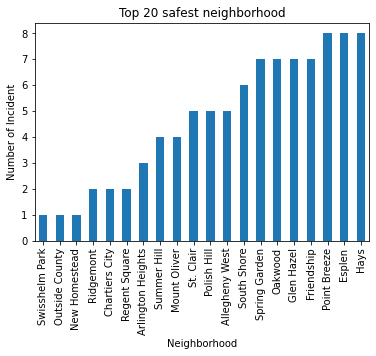

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
top20_safety.plot(kind = 'bar', title = 'Top 20 safest neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incident")

Text(0.5, 1.0, 'Top 20 Neighborhoods with the Most Incident')

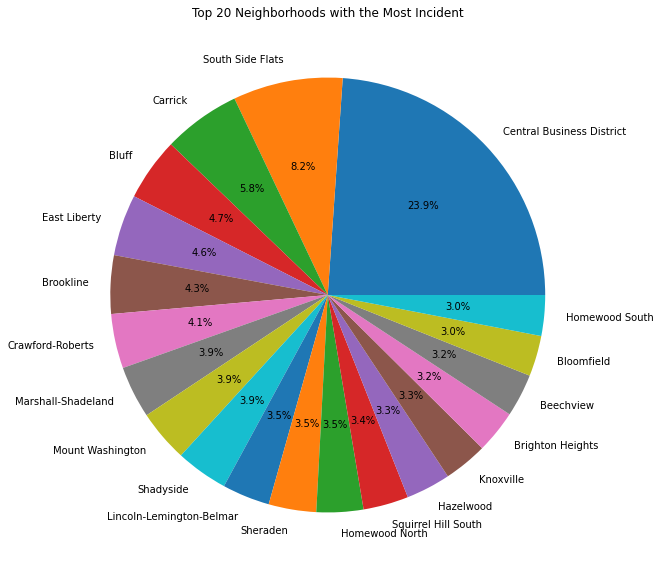

In [7]:
incident_ranking = arrest_data ['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending = False)
top20_incident = incident_ranking.iloc[:20]
plt.figure(figsize=(10,10))
plt.pie(top20_incident, labels=top20_incident.index, autopct='%1.1f%%')
plt.title('Top 20 Neighborhoods with the Most Incident')
#plt.show()

## Map
* The following map shows the distribution of neighborhoods in Pittsburgh. Deeper color represents more arrests, meaning poor security in a neighborhood.

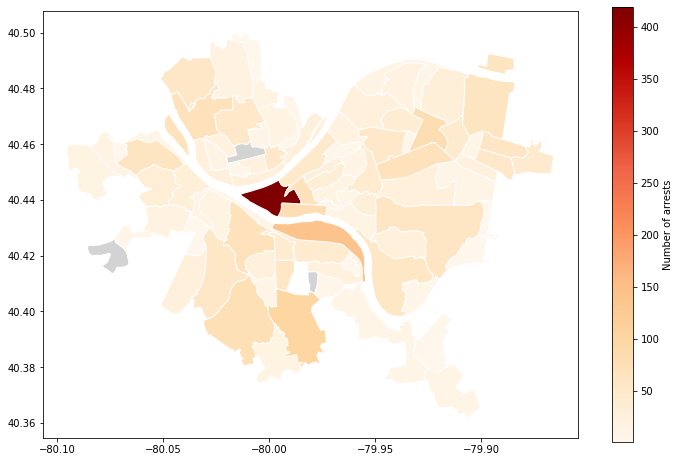

In [8]:
import geopandas

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# do the merge
arrest_map = neighborhoods.merge(safety_ranking, how='left', left_on='hood', right_index=True)
# look at the head to confirm it merged correctly
arrest_map[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()

arrest_map.plot(column='INCIDENTNEIGHBORHOOD', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of arrests"}, # label the legend
               figsize=(12, 8),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )